In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
history = pd.read_hdf('./regelum_data/outputs/2024-04-15/23-55-34/0/.callbacks/HistoricalDataCallback/observations_actions_it_00020_ep_00008.h5')  

In [43]:
policy = pd.read_hdf('./regelum_data/outputs/2024-04-15/18-23-30/0/.callbacks/ObjectiveSaver/C. Policy objective. It 00020.h5')  

In [44]:
critic = pd.read_hdf('./regelum_data/outputs/2024-04-15/18-23-30/0/.callbacks/ObjectiveSaver/B. Critic objective. It 00020.h5')  

In [45]:
policy

,epoch_idx,objective
0,0,-24.368004


In [46]:
critic

,epoch_idx,objective
0,0,4325332.0
1,1,4324163.5
2,2,4323029.5
3,3,4321930.5
4,4,4320868.0
5,5,4319841.5
6,6,4318851.0
7,7,4317898.0
8,8,4316981.0
9,9,4316102.0


In [4]:
history

,time,current_value,episode_id,iteration_id,running_objective_portfolio,running_objective_market,delta_volume_0,delta_volume_1,delta_volume_2,drift_0,...,current_volume_2,prev_volume_0,prev_volume_1,prev_volume_2,current_price_0 [USD],current_price_1 [USD],current_price_2 [USD],prev_price_0 [USD],prev_price_1 [USD],prev_price_2 [USD]
0,0.00,0.000397,8,20,0.007938,0.000000,0.047465,-0.006937,0.038855,0.0,...,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
1,0.05,0.001211,8,20,0.016853,0.000000,0.103137,0.054373,0.011016,0.0,...,1.001943,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
2,0.10,0.003325,8,20,0.045310,-0.041392,0.049918,0.036812,-0.047551,0.0,...,1.002494,1.002373,0.999653,1.001943,1.0,1.0,1.0,1.0,1.0,1.0
3,0.15,0.011815,8,20,0.188410,-0.185484,0.080051,-0.094559,0.043770,0.0,...,1.000116,1.007530,1.002372,1.002494,1.0,1.0,1.0,1.0,1.0,1.0
4,0.20,0.011962,8,20,0.003386,-0.000135,0.009888,0.002264,0.020359,0.0,...,1.002305,1.010026,1.004212,1.000116,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,6.85,0.013261,8,20,0.013961,-0.000408,0.086548,-0.074576,0.123558,0.0,...,1.188664,1.284376,0.745156,1.188001,1.0,1.0,1.0,1.0,1.0,1.0
138,6.90,0.013243,8,20,-0.045095,0.041546,-0.004112,-0.055450,0.024069,0.0,...,1.194842,1.282749,0.744730,1.188664,1.0,1.0,1.0,1.0,1.0,1.0
139,6.95,0.013325,8,20,0.204348,-0.206122,0.057347,-0.096506,0.021416,0.0,...,1.196045,1.287077,0.741001,1.194842,1.0,1.0,1.0,1.0,1.0,1.0
140,7.00,0.013325,8,20,-0.000828,-0.000470,0.039510,-0.004961,-0.047525,0.0,...,1.197116,1.286871,0.738228,1.196045,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
history[['cash share', 'share_0', 'share_1', 'share_2']]

,cash share,share_0,share_1,share_2
0,0.250000,0.250000,0.250000,0.250000
1,0.249007,0.250594,0.249914,0.250486
2,0.246899,0.251883,0.250594,0.250624
3,0.246408,0.252508,0.251054,0.250030
4,0.246040,0.253509,0.249873,0.250578
...,...,...,...,...
137,0.195765,0.320767,0.186228,0.297240
138,0.194068,0.321850,0.185297,0.298785
139,0.194511,0.321799,0.184604,0.299087
140,0.194731,0.322517,0.183397,0.299355


In [6]:
history[['cash [USD]', 'current_volume_0', 'current_volume_1', 'current_volume_2', 'prev_volume_0', 'prev_volume_1', 'prev_volume_2']]

,cash [USD],current_volume_0,current_volume_1,current_volume_2,prev_volume_0,prev_volume_1,prev_volume_2
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996026,1.002373,0.999653,1.001943,1.000000,1.000000,1.000000
2,0.987591,1.007530,1.002372,1.002494,1.002373,0.999653,1.001943
3,0.985626,1.010026,1.004212,1.000116,1.007530,1.002372,1.002494
4,0.984152,1.014029,0.999484,1.002305,1.010026,1.004212,1.000116
...,...,...,...,...,...,...,...
137,0.782868,1.282749,0.744730,1.188664,1.284376,0.745156,1.188001
138,0.776078,1.287077,0.741001,1.194842,1.282749,0.744730,1.188664
139,0.777848,1.286871,0.738228,1.196045,1.287077,0.741001,1.194842
140,0.778726,1.289738,0.733403,1.197116,1.286871,0.738228,1.196045


In [7]:
history[['cash [USD]', 'current_price_0 [USD]', 'current_price_1 [USD]', 'current_price_2 [USD]', 'prev_price_0 [USD]', 'prev_price_1 [USD]', 'prev_price_2 [USD]']]

,cash [USD],current_price_0 [USD],current_price_1 [USD],current_price_2 [USD],prev_price_0 [USD],prev_price_1 [USD],prev_price_2 [USD]
0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
1,0.996026,1.0,1.0,1.0,1.0,1.0,1.0
2,0.987591,1.0,1.0,1.0,1.0,1.0,1.0
3,0.985626,1.0,1.0,1.0,1.0,1.0,1.0
4,0.984152,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
137,0.782868,1.0,1.0,1.0,1.0,1.0,1.0
138,0.776078,1.0,1.0,1.0,1.0,1.0,1.0
139,0.777848,1.0,1.0,1.0,1.0,1.0,1.0
140,0.778726,1.0,1.0,1.0,1.0,1.0,1.0


In [8]:
history[['first_momentum', 'second_momontum']]

,first_momentum,second_momontum
0,0.000000,0.000000e+00
1,0.000000,0.000000e+00
2,0.001257,1.662919e-06
3,0.002728,7.558101e-06
4,0.000754,7.796550e-07
...,...,...
137,0.000053,1.741932e-08
138,-0.000408,1.780270e-07
139,0.001981,4.226474e-06
140,-0.000424,4.993731e-07


In [10]:
history.columns

Index(['time', 'current_value', 'episode_id', 'iteration_id',
       'running_objective_portfolio', 'running_objective_market',
       'delta_volume_0', 'delta_volume_1', 'delta_volume_2', 'drift_0',
       'drift_1', 'drift_2', 'volatility_0', 'volatility_1', 'volatility_2',
       'corr_0_1', 'corr_0_2', 'corr_1_2', 'cash share', 'share_0', 'share_1',
       'share_2', 'returns_0', 'returns_1', 'returns_2', 'cash [USD]',
       'first_momentum', 'second_momontum', 'current_volume_0',
       'current_volume_1', 'current_volume_2', 'prev_volume_0',
       'prev_volume_1', 'prev_volume_2', 'current_price_0 [USD]',
       'current_price_1 [USD]', 'current_price_2 [USD]', 'prev_price_0 [USD]',
       'prev_price_1 [USD]', 'prev_price_2 [USD]'],
      dtype='object')

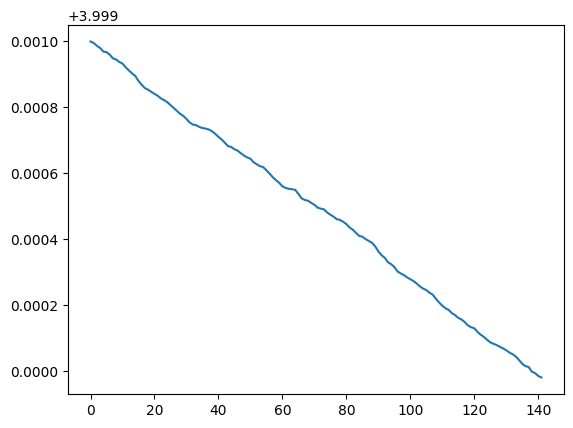

In [9]:
plt.plot(history['current_price_0 [USD]']*history['current_volume_0'] +
         history['current_price_1 [USD]']*history['current_volume_1']+
         history['current_price_2 [USD]']*history['current_volume_2']+
         history['cash [USD]'])